In [1]:
import tensorflow as tf
from utils import train_val_generators
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve
from tensorflow.keras.models import load_model

In [2]:
model_1 = load_model('M1.h5')
model_2 = load_model('M2.h5')
model_3 = load_model('M3.h5')
model_4 = load_model('M4.h5')

In [3]:
test_generator, validation_generator, test_generator = train_val_generators('cell_images/')

Found 21976 images belonging to 2 classes.
Found 5494 images belonging to 2 classes.
Found 88 images belonging to 2 classes.


In [4]:
true_labels = test_generator.classes

predictions_m1 = model_1.predict_generator(test_generator)

predictions_m2 = model_2.predict_generator(test_generator)

predictions_m3 = model_3.predict_generator(test_generator)

predictions_m4 = model_4.predict_generator(test_generator)

predictions_m4 = np.where(predictions_m4.ravel()>=0.5,1,0)

predictions_m3 = np.where(predictions_m3.ravel()>=0.5,1,0)

predictions_m2 = np.where(predictions_m2.ravel()>=0.5,1,0)

predictions_m1 = np.where(predictions_m1.ravel()>=0.5,1,0)

/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """
/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys
/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`

In [5]:
from sklearn.metrics import roc_curve, classification_report

fpr4, tpr4, thresholds4 = roc_curve(true_labels, predictions_m4)

fpr3, tpr3, thresholds3 = roc_curve(true_labels, predictions_m3)

fpr2, tpr2, thresholds2 = roc_curve(true_labels, predictions_m2)

fpr1, tpr1, thresholds1 = roc_curve(true_labels, predictions_m1)

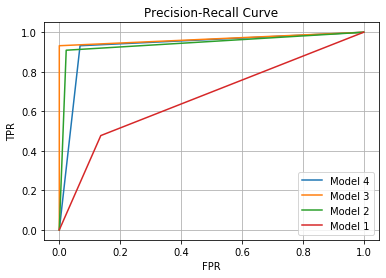

In [6]:
from utils import plot_roc

plot_roc(fpr4,tpr4, label_='Model 4')

plot_roc(fpr3,tpr3, label_='Model 3')

plot_roc(fpr2,tpr2, label_='Model 2')

plot_roc(fpr1,tpr1, label_='Model 1')

plt.grid()

In [8]:
print(classification_report(true_labels, predictions_m1))

              precision    recall  f1-score   support

           0       0.62      0.86      0.72        44
           1       0.78      0.48      0.59        44

    accuracy                           0.67        88
   macro avg       0.70      0.67      0.66        88
weighted avg       0.70      0.67      0.66        88



In [9]:
print(classification_report(true_labels, predictions_m2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        44
           1       0.98      0.91      0.94        44

    accuracy                           0.94        88
   macro avg       0.95      0.94      0.94        88
weighted avg       0.95      0.94      0.94        88



In [10]:
print(classification_report(true_labels, predictions_m3))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        44
           1       1.00      0.93      0.96        44

    accuracy                           0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



In [11]:
print(classification_report(true_labels, predictions_m4))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        44
           1       0.93      0.93      0.93        44

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88



Model 3 achieved the best performance with 97% accuracy. Also, the best roc curve. Now, let's see the output of the convolutional layers to understand how the model identificate parasitized cells:

1/1 [==============================] - 0s 82ms/step


/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


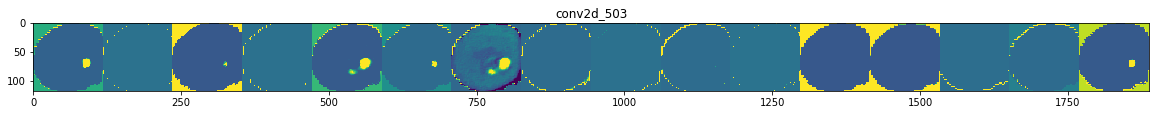

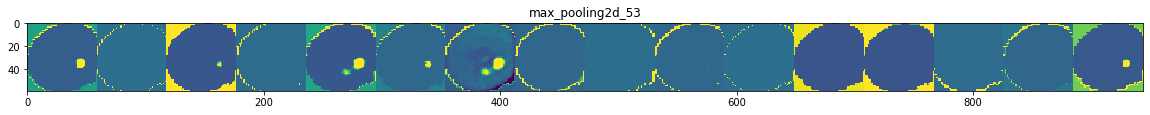

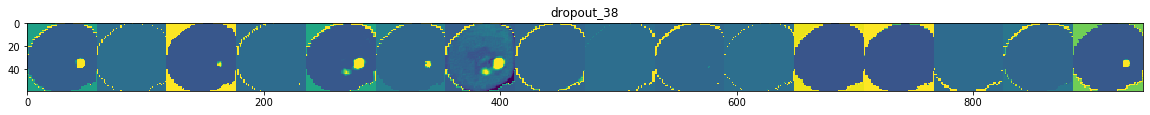

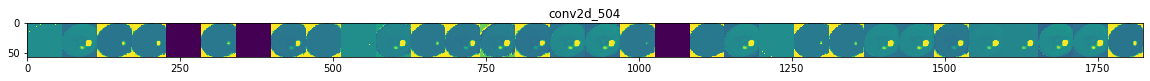

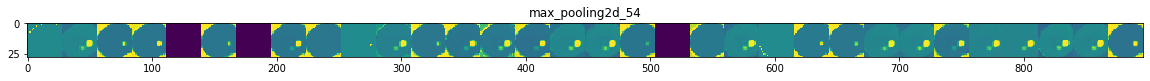

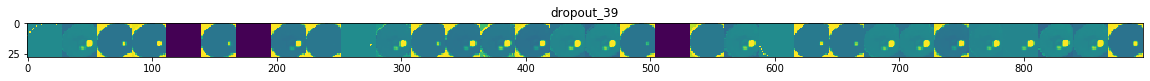

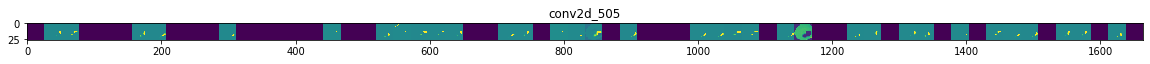

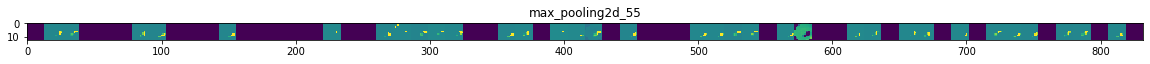

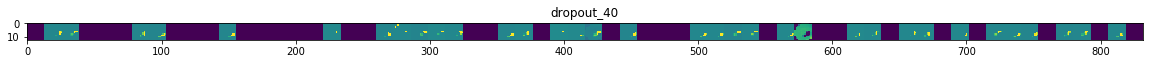

In [31]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os

dir = 'cell_images/'


parasitized_fnames = os.listdir( dir+'Parasitized/' )
unparasitized_fnames = os.listdir( dir+'Uninfected/' )
para_img_files = [os.path.join(dir+'Parasitized/', f) for f in parasitized_fnames]
unin_img_files = [os.path.join(dir+'Uninfected/', f) for f in unparasitized_fnames]


def plot_convolution_layers(a):
        
    # Define a new Model that will take an image as input, and will output intermediate representations for all layers in the previous model

    dir = 'cell_images/'

    model = model_4

    parasitized_fnames = os.listdir( dir+'Parasitized/' )
    unparasitized_fnames = os.listdir( dir+'Uninfected/' )

    successive_outputs = [layer.output for layer in model.layers]

    visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

    # Prepare a random input image from the training set.

    para_img_files = [os.path.join(dir+'Parasitized/', f) for f in parasitized_fnames]

    unin_img_files = [os.path.join(dir+'Uninfected/', f) for f in unparasitized_fnames]

    img_path = random.choice(a)

    img = load_img(img_path, target_size=(120, 120))  # this is a PIL image

    x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)

    x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

    # Scale by 1/255
    x /= 255.0

    # Run the image through the network, thus obtaining all intermediate representations for this image.
    successive_feature_maps = visualization_model.predict(x)

    layer_names = [layer.name for layer in model.layers]

    # Display the representations
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    
        if len(feature_map.shape) == 4:
            
            n_features = feature_map.shape[-1]  # number of features in the feature map
            size = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
            
            display_grid = np.zeros((size, size * n_features))
            
            for i in range(n_features):

                x  = feature_map[0, :, :, i]
                x -= x.mean()
                x /= x.std ()
                x *=  64
                x += 128
                x  = np.clip(x, 0, 255).astype('uint8')
                display_grid[:, i * size : (i + 1) * size] = x 


            scale = 20. / n_features
            plt.figure( figsize=(scale * n_features, scale) )
            plt.title ( layer_name )
            plt.grid  ( False )
            plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 


plot_convolution_layers(para_img_files)

1/1 [==============================] - 0s 87ms/step


/home/rafaelpavan95/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


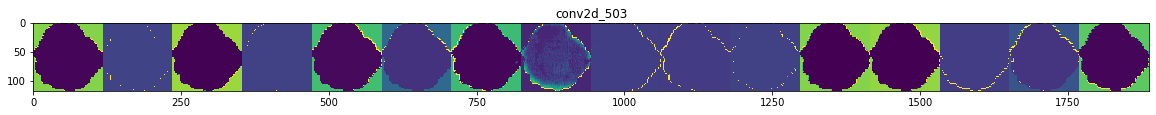

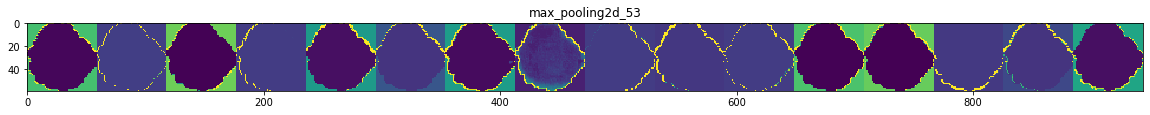

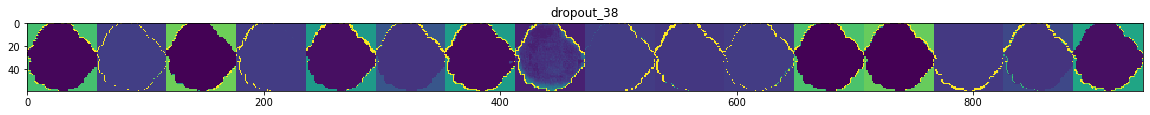

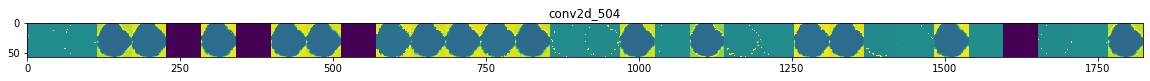

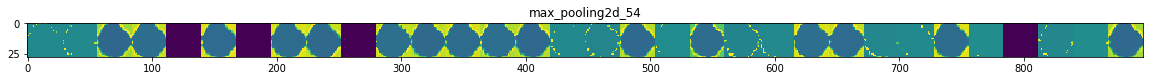

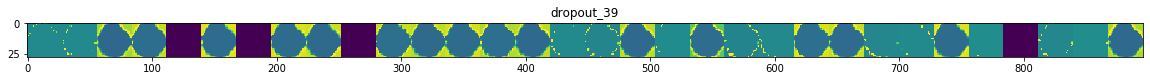

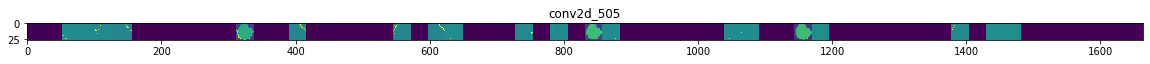

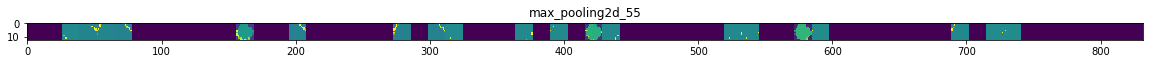

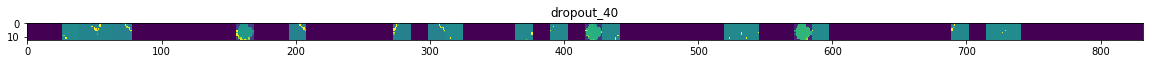

In [23]:
plot_convolution_layers(unin_img_files)

Finally, we can understand a little about how the model works. We can see by the plots above, that as convolutional layers go deep in the neural network, more abstract their intermediate results are and the quantity of information is reduced to only aspects that matters. So, in the final dropout_40 layer, parasitized cells can be clearly noted because of the central spots while uninfected cells doesn't have this.